In [47]:
import pandas as pd
import json

meat_df = pd.read_json(r'new_meat.json')
vegan_df = pd.read_json (r'vegan.json')
veg_df = pd.read_json(r'vegetarian.json')

vegan_df = vegan_df['recipe'].apply(pd.Series)
veg_df = veg_df['recipe'].apply(pd.Series)
meat_df = meat_df['recipe'].apply(pd.Series)
df = pd.concat([vegan_df, veg_df, meat_df])

In [48]:
df.head()

,id,kitchen-id,co2-value,eaternity-award,url,rating,titles,date,location,servings,recipe-portions,ingredients,food-unit
0,0_vegan,our_name_id,423,True,https://migusto.migros.ch/de/rezepte/pasta-mit...,A,"[{'language': 'en', 'value': 'Pasta'}]",2020-09-19,Schweiz,1,1,[],0.845367
1,1_vegan,our_name_id,550,True,NaN,A,"[{'language': 'en', 'value': 'Vegi Sandwich'}]",2020-09-19,Schweiz,1,1,[],0.996958
2,2_vegan,our_name_id,1084,False,NaN,B,"[{'language': 'en', 'value': 'Tomato soup'}]",2020-09-19,Schweiz,1,1,[],0.162327
3,3_vegan,our_name_id,517,True,NaN,A,"[{'language': 'en', 'value': 'Lentil and cocon...",2020-09-19,Schweiz,1,1,[],1.007703
4,4_vegan,our_name_id,608,True,NaN,A,"[{'language': 'en', 'value': 'Peppers stuffed ...",2020-09-19,Schweiz,1,1,[],0.436423


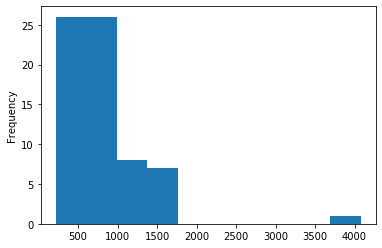

In [49]:
hist = df['co2-value'].plot.hist(bins=10)

In [50]:
titles = df['titles'].apply(pd.Series).apply(pd.Series)

In [51]:
titles = titles[0].apply(pd.Series)

In [52]:
titles.head()

,language,value
0,en,Pasta
1,en,Vegi Sandwich
2,en,Tomato soup
3,en,Lentil and coconut soup
4,en,Peppers stuffed with tofu


In [53]:
df['title'] = titles['value']

In [54]:
df.head()

,id,kitchen-id,co2-value,eaternity-award,url,rating,titles,date,location,servings,recipe-portions,ingredients,food-unit,title
0,0_vegan,our_name_id,423,True,https://migusto.migros.ch/de/rezepte/pasta-mit...,A,"[{'language': 'en', 'value': 'Pasta'}]",2020-09-19,Schweiz,1,1,[],0.845367,Pasta
1,1_vegan,our_name_id,550,True,NaN,A,"[{'language': 'en', 'value': 'Vegi Sandwich'}]",2020-09-19,Schweiz,1,1,[],0.996958,Vegi Sandwich
2,2_vegan,our_name_id,1084,False,NaN,B,"[{'language': 'en', 'value': 'Tomato soup'}]",2020-09-19,Schweiz,1,1,[],0.162327,Tomato soup
3,3_vegan,our_name_id,517,True,NaN,A,"[{'language': 'en', 'value': 'Lentil and cocon...",2020-09-19,Schweiz,1,1,[],1.007703,Lentil and coconut soup
4,4_vegan,our_name_id,608,True,NaN,A,"[{'language': 'en', 'value': 'Peppers stuffed ...",2020-09-19,Schweiz,1,1,[],0.436423,Peppers stuffed with tofu


In [55]:
df_3 = df[['title', 'co2-value', 'url']]

In [56]:
df_3.head()

,title,co2-value,url
0,Pasta,423,https://migusto.migros.ch/de/rezepte/pasta-mit...
1,Vegi Sandwich,550,NaN
2,Tomato soup,1084,NaN
3,Lentil and coconut soup,517,NaN
4,Peppers stuffed with tofu,608,NaN


In [57]:
df_3['co2-value'].mean() #Swiss average

816.6911764705883

In [58]:
df_3.sort_values(by='co2-value').head(10)

,title,co2-value,url
39,Potato Gnocchi with vegetables,223,NaN
17,Vegan burger,249,https://migusto.migros.ch/de/rezepte/veganer-b...
18,Onion soup,298,https://migusto.migros.ch/de/rezepte/kartoffel...
15,Caramelised chicory soup,301,NaN
12,Quinoa salad,334,https://migusto.migros.ch/de/rezepte/quinoasalat
16,Cannelloni stuffed with porcini and rocket,396,NaN
8,Crispy Organic Beetroot and Miso,405,https://migusto.migros.ch/de/rezepte/rote-lins...
0,Pasta,423,https://migusto.migros.ch/de/rezepte/pasta-mit...
1,Fish stikcs with vegetables,447,https://migusto.migros.ch/de/rezepte/selbst-ge...
21,Oriental vegetable soup,447,https://migusto.migros.ch/de/rezepte/suppe-mit...


In [60]:
df_3.url.fillna(f"https://www.google.com/search?tbm=isch&q={df_3.title}")

0    https://migusto.migros.ch/de/rezepte/pasta-mit...
1    https://www.google.com/search?tbm=isch&q=0    ...
2    https://www.google.com/search?tbm=isch&q=0    ...
3    https://www.google.com/search?tbm=isch&q=0    ...
4    https://www.google.com/search?tbm=isch&q=0    ...
                           ...                        
0       https://migusto.migros.ch/de/rezepte/roastbeef
1    https://migusto.migros.ch/de/rezepte/selbst-ge...
2    https://www.google.com/search?tbm=isch&q=0    ...
3    https://www.google.com/search?tbm=isch&q=0    ...
4    https://www.google.com/search?tbm=isch&q=0    ...
Name: url, Length: 68, dtype: object

,title,co2-value,url
0,Pasta,423,https://migusto.migros.ch/de/rezepte/pasta-mit...
1,Vegi Sandwich,550,NaN
2,Tomato soup,1084,NaN
3,Lentil and coconut soup,517,NaN
4,Peppers stuffed with tofu,608,NaN


In [62]:
df_2 = df_3[['title', 'co2-value']]

In [63]:
df_2.head()

,title,co2-value
0,Pasta,423
1,Vegi Sandwich,550
2,Tomato soup,1084
3,Lentil and coconut soup,517
4,Peppers stuffed with tofu,608


In [64]:
df_2.to_csv('title_co2.csv')